In [731]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline
import seaborn as sns
from datetime import datetime

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

### Load data. Source:  [Zillow Research](https://www.zillow.com/research/data/)

In [732]:
# Load data: number of houses sold by zip code
sale_counts = pd.read_csv("data/Sale_Counts_Zip.csv")
sale_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31447 entries, 0 to 31446
Columns: 147 entries, RegionID to seasAdj
dtypes: float64(140), int64(6), object(1)
memory usage: 35.3+ MB


In [733]:
sale_counts.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,seasAdj
0,61639,10025,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,...,57.0,36.0,68.0,80.0,66.0,61.0,53.0,50.0,61.0,0
1,84654,60657,Illinois,2,134.0,172.0,143.0,184.0,229.0,162.0,...,157.0,192.0,156.0,189.0,144.0,124.0,111.0,82.0,119.0,0
2,61637,10023,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,60.0,82.0,75.0,83.0,89.0,87.0,84.0,65.0,0
3,91982,77494,Texas,4,61.0,77.0,85.0,100.0,121.0,95.0,...,280.0,302.0,287.0,318.0,251.0,189.0,198.0,179.0,NaN,0
4,84616,60614,Illinois,5,NaN,NaN,NaN,NaN,NaN,NaN,...,177.0,208.0,216.0,200.0,194.0,164.0,121.0,87.0,120.0,0


In [734]:
# Load data: days on zillow 
daysonz = pd.read_csv("data/DaysOnZillow_City.csv")
daysonz.head()

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,1,6181,New York,City,NY,204.0,188.0,214.0,212.0,210.0,...,171.0,178.0,182.0,174.0,158.0,154.0,156.0,164.0,171.0,180.0
1,2,12447,Los Angeles,City,CA,121.0,138.0,131.0,114.0,86.5,...,91.0,71.0,64.0,61.0,62.0,64.0,66.5,69.0,71.0,69.0
2,3,39051,Houston,City,TX,134.0,137.0,132.0,113.0,92.0,...,92.0,83.0,74.0,71.0,70.0,67.0,71.0,82.0,86.0,93.0
3,4,17426,Chicago,City,IL,186.0,184.0,191.0,189.0,176.0,...,135.0,133.0,75.0,70.0,77.0,85.0,90.0,98.0,105.0,99.0
4,5,6915,San Antonio,City,TX,101.0,110.0,120.5,110.0,104.0,...,82.0,68.0,62.0,61.0,61.0,60.0,62.0,70.0,76.0,78.0


In [735]:
def make_time_series(data, regionname, dropcols):
    r=data.copy()
    r.set_index("RegionName", inplace=True) # for easy selection
    r = r.loc[regionname]
    r.drop(dropcols, axis=1, inplace=True)
    r = r.transpose()
    r.index = pd.to_datetime(r.index) # Change from str to datetime
    r.index.set_names('date', inplace=True) # Name index "date" for reference later
    return r

def make_year_average(timeseries):
    ts = timeseries.copy()
    ts.index = ts.index.month # extract months from datetime indices for grouping
    mean_series = ts.groupby("date").mean() # is automatically sorted from 1 (jan) to 12(dec)
    mean_series.index.set_names('month', inplace=True)
    return mean_series

In [736]:
# Extract & plot days on zillow for certain zip code
dropcols = ["RegionID", "StateName", "SizeRank", "RegionType", "StateName"]

doz = make_time_series(daysonz, ["Scarsdale", "New York"], dropcols)
doz.head()

RegionName,Scarsdale,New York
date,,
2010-01-01,NaN,204.0
2010-02-01,NaN,188.0
2010-03-01,NaN,214.0
2010-04-01,NaN,212.0
2010-05-01,NaN,210.0


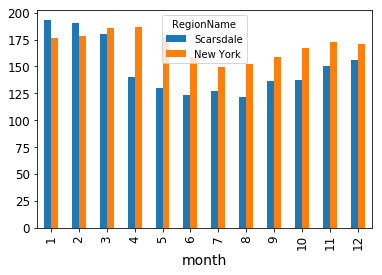

In [737]:
# Average across years & plot monthly avg
doz_yearavg = make_year_average(doz)
doz_yearavg.plot.bar()

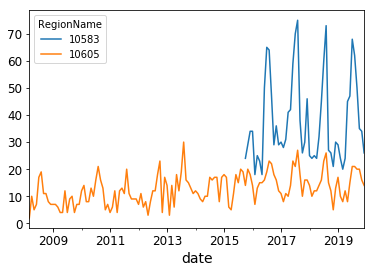

In [740]:
# Extract & plot number of houses sold
dropcols = ["RegionID", "StateName", "SizeRank", "seasAdj"]

num_houses = make_time_series(sale_counts, [10583, 10605], dropcols)
num_houses.plot()

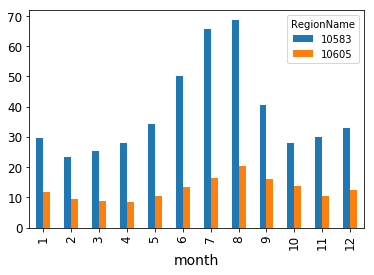

In [741]:
# Average across years & plot monthly avg
num_houses_yearavg = make_year_average(num_houses)
num_houses_yearavg.plot.bar()

In [742]:
# Plot relationship between number of houses sold and days on zillow
df = pd.DataFrame({"num_houses": num_houses, "doz":doz})
sns.regplot('num_houses', 'doz', data=df)

ValueError: If using all scalar values, you must pass an index

In [743]:
# Median list price
med_price = pd.read_csv("data/Zip_MedianListingPrice_AllHomes.csv", encoding = "ISO-8859-1")
med_price.head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,795000.0,775000.0,799000.0,744500.0,...,1270000.0,1224500.0,1195000.0,1195000.0,1195000.0,1199000.0,1195000.0,1195000.0,1195000.0,1195000.0
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,389900.0,381900.0,369900.0,375000.0,...,449000.0,454900.0,469450.0,469000.0,466250.0,472450.0,459999.0,450000.0,450000.0,450000.0
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,NaN,NaN,NaN,NaN,...,1695000.0,1700000.0,1788000.0,1750000.0,1725000.0,1765000.0,1825000.0,1800000.0,1835000.0,1885000.0
3,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,287500.0,286808.0,290990.0,289900.0,...,350000.0,355924.0,355000.0,359990.0,359900.0,365000.0,365000.0,359900.0,356000.0,359000.0
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,489000.0,474000.0,459900.0,449500.0,...,652500.0,635000.0,622200.0,609950.0,599000.0,599000.0,625000.0,649900.0,649000.0,649000.0


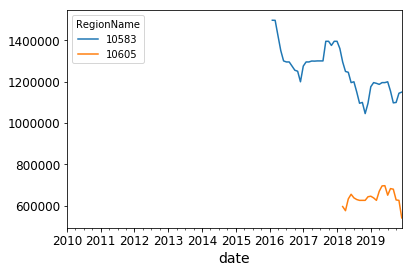

In [748]:
dropcols = ["City", "State", "Metro", "CountyName", "SizeRank"]

list_price = make_time_series(med_price, [10583, 10605], dropcols)
list_price.plot()

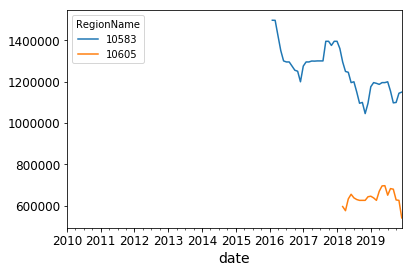

In [749]:
list_price.plot()

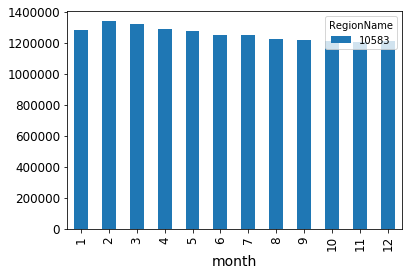

In [746]:
# Average across years and plot monthly avg
list_price_yearavg = make_year_average(list_price)
list_price_yearavg.plot.bar()